<a href="https://colab.research.google.com/github/Nader-al/ksa/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_excel(io.BytesIO(uploaded['SA-COVID19v1.xlsx']))
df

Saving SA-COVID19v1.xlsx to SA-COVID19v1.xlsx
      Daily / Cumulative     Indicator       Date                   Event  \
0                  Daily         Cases 2020-03-02  First case of COVID-19   
1                  Daily         Cases 2020-03-04        Umrah suspension   
2                  Daily         Cases 2020-03-07                     NaN   
3                  Daily         Cases 2020-03-08                     NaN   
4                  Daily         Cases 2020-03-10                     NaN   
...                  ...           ...        ...                     ...   
30868         Cumulative  Active cases 2020-05-13                     NaN   
30869         Cumulative  Active cases 2020-05-13                     NaN   
30870         Cumulative  Active cases 2020-05-13                     NaN   
30871         Cumulative  Active cases 2020-05-13                     NaN   
30872         Cumulative  Active cases 2020-05-13                     NaN   

                 region      

In [3]:
 # معرفة نوع البيانات
df.dtypes

Daily / Cumulative            object
Indicator                     object
Date                  datetime64[ns]
Event                         object
region                        object
City                          object
Cases                         object
dtype: object

In [4]:
#احصائيات
df.describe(include="all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Daily / Cumulative,Indicator,Date,Event,region,City,Cases
count,30873,30873,30873,1144,30867,30867,30867.0
unique,2,5,104,14,14,188,2156.0
top,Cumulative,Cases,2020-06-13 00:00:00,Partial lifting of curfew in all cities except...,Eastern Region,Total,1.0
freq,24440,12534,772,273,5455,713,6337.0
first,NaN,NaN,2020-03-02 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-06-13 00:00:00,NaN,NaN,NaN,NaN


In [5]:
#التاكد من عدم وجود بيانات مفقودة
df.isnull().sum()

Daily / Cumulative        0
Indicator                 0
Date                      0
Event                 29729
region                    6
City                      6
Cases                     6
dtype: int64

In [11]:
####تحويل نوع بيانات الحالات من نص الى رقم 
df3 = df3.replace('?', np.nan)
df3['Cases'] = df3['Cases'].fillna(0)
df3['Cases'] = df3['Cases'].astype('int64')
df3.dtypes

Indicator            object
Date         datetime64[ns]
region               object
City                 object
Cases                 int64
dtype: object

In [6]:
# حذف الاعمدة الغير مرغوب بها
DataCovrage = df 
# Only Cover Daily Cases from row:2 To row:1275
DataCovrage = DataCovrage.loc[1:1274]
DataCovrage.shape
DataCovrage

,Daily / Cumulative,Indicator,Date,Event,region,City,Cases
1,Daily,Cases,2020-03-04,Umrah suspension,Eastern Region,Qatif,1
2,Daily,Cases,2020-03-07,NaN,Eastern Region,Qatif,2
3,Daily,Cases,2020-03-08,NaN,Total,Total,4
4,Daily,Cases,2020-03-10,NaN,Eastern Region,Dammam,4
5,Daily,Cases,2020-03-12,NaN,Mecca,Mecca,21
...,...,...,...,...,...,...,...
1270,Daily,Mortalities,2020-06-13,NaN,Total,Total,40
1271,Daily,Mortalities,2020-06-13,NaN,Jazan,Sabya,1
1272,Daily,Mortalities,2020-06-13,NaN,Riyadh,Huraymila,1
1273,Daily,Mortalities,2020-06-13,NaN,Jazan,Baish,1


In [7]:
# drorp Unecessary record ('Total') حذف كلمة  الاجمالي من المحافظة وحفظ المشروع
InexTotal = DataCovrage[(DataCovrage['region'] == 'Total')].index
DataCovrage.drop(InexTotal, inplace=True)
#changing the DataFrame name from "DataCovrage" into "df2"
df2 = DataCovrage
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Daily / Cumulative,Indicator,Date,Event,region,City,Cases
1,Daily,Cases,2020-03-04,Umrah suspension,Eastern Region,Qatif,1
2,Daily,Cases,2020-03-07,NaN,Eastern Region,Qatif,2
4,Daily,Cases,2020-03-10,NaN,Eastern Region,Dammam,4
5,Daily,Cases,2020-03-12,NaN,Mecca,Mecca,21
6,Daily,Cases,2020-03-13,NaN,Mecca,Mecca,26
...,...,...,...,...,...,...,...
1269,Daily,Mortalities,2020-06-13,NaN,Riyadh,Riyadh,4
1271,Daily,Mortalities,2020-06-13,NaN,Jazan,Sabya,1
1272,Daily,Mortalities,2020-06-13,NaN,Riyadh,Huraymila,1
1273,Daily,Mortalities,2020-06-13,NaN,Jazan,Baish,1


In [8]:
#######  ['Daily / Cumulative','Event']حذف اعمدة 
#drop Attributes ['Daily / Cumulative','Event']
df3 =df2.drop(['Daily / Cumulative','Event'],axis=1)
df3
#check All missing values in dataset

,Indicator,Date,region,City,Cases
1,Cases,2020-03-04,Eastern Region,Qatif,1
2,Cases,2020-03-07,Eastern Region,Qatif,2
4,Cases,2020-03-10,Eastern Region,Dammam,4
5,Cases,2020-03-12,Mecca,Mecca,21
6,Cases,2020-03-13,Mecca,Mecca,26
...,...,...,...,...,...
1269,Mortalities,2020-06-13,Riyadh,Riyadh,4
1271,Mortalities,2020-06-13,Jazan,Sabya,1
1272,Mortalities,2020-06-13,Riyadh,Huraymila,1
1273,Mortalities,2020-06-13,Jazan,Baish,1


In [9]:
##### عمل مجوعات للاعمدة التالية )(cases,region,indecator)
df3.groupby(['Indicator','region'])['Cases'].describe()

count  unique  top  freq
Indicator    region                                    
Active cases Eastern Region        1       1    1     1
Cases        Al Bahah             19       6    1     7
             Al Jouf               9       3    1     6
             Asir                 76      20    1    24
             Eastern Region      150      65    4    17
             Hail                 11       9    1     3
             Jazan                44      17    2    14
             Mecca               111      58    1    27
             Medina               39      25    1    10
             Najran               18       9    1     4
             Northern Borders     11       7    1     3
             Qassim               46      14    1    18
             Riyadh              134      33    1    43
             Tabuk                19       9    1     5
Mortalities  Asir                  1       1    2     1
             Eastern Region        8       2    1     5
             Jazan                 3       1    1     3
             Mecca                36       9    1    14
             Medina                6       3    1     3
             Northern Borders      2       1    1     2
             Qassim                2       1    1     2
             Riyadh               10       4    2     4
             Tabuk                 1       1    2     1
Recoveries   Al Bahah             15       5    1     5
             Al Jouf               7       3    1     3
             Asir                 50      14    1    23
             Eastern Region      123      48    1    20
             Hail                 10       8    4     2
             Jazan                27      12    1    10
             Mecca                77      28    1    22
             Medina               29      18    1     7
             Najran               10       5    2     3
             Northern Borders     11       5    3     4
             Qassim               20      10    1     8
             Riyadh               69      26    1    21
             Tabuk                19      11    1     5

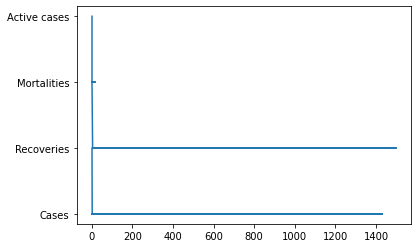

In [13]:
plt.plot(df3['Cases'],df3['Indicator'])
plt.show()